In [17]:
import pandas as pd
import numpy as np

In [18]:
df = pd.read_csv("./football.csv")
df

,Team,Ball,Blakeman,Prioleau
0,0,Patriots 1,11.50,11.80
1,0,Patriots 2,10.85,11.20
2,0,Patriots 3,11.15,11.50
3,0,Patriots 4,10.70,11.00
4,0,Patriots 5,11.10,11.45
5,0,Patriots 6,11.60,11.95
6,0,Patriots 7,11.85,12.30
7,0,Patriots 8,11.10,11.55
8,0,Patriots 9,10.95,11.35
9,0,Patriots 10,10.50,10.90


Taking the average of pressures measured by both the officials

In [19]:
df.columns

Index(['Team', 'Ball', 'Blakeman', 'Prioleau'], dtype='object')

In [20]:
df['Combined'] = (df['Blakeman'] + df['Prioleau'])/2
df

,Team,Ball,Blakeman,Prioleau,Combined
0,0,Patriots 1,11.50,11.80,11.650
1,0,Patriots 2,10.85,11.20,11.025
2,0,Patriots 3,11.15,11.50,11.325
3,0,Patriots 4,10.70,11.00,10.850
4,0,Patriots 5,11.10,11.45,11.275
5,0,Patriots 6,11.60,11.95,11.775
6,0,Patriots 7,11.85,12.30,12.075
7,0,Patriots 8,11.10,11.55,11.325
8,0,Patriots 9,10.95,11.35,11.150
9,0,Patriots 10,10.50,10.90,10.700


In [21]:
df.drop(['Blakeman', 'Prioleau'], inplace= True, axis= 1)
df

,Team,Ball,Combined
0,0,Patriots 1,11.650
1,0,Patriots 2,11.025
2,0,Patriots 3,11.325
3,0,Patriots 4,10.850
4,0,Patriots 5,11.275
5,0,Patriots 6,11.775
6,0,Patriots 7,12.075
7,0,Patriots 8,11.325
8,0,Patriots 9,11.150
9,0,Patriots 10,10.700


Calculating pressure drops for each balls

In [23]:
df['Pressure drops'] = np.nan
df['Pressure drops'] = np.where(df['Team'] == 0, 12.5 - df['Combined'], df['Pressure drops'])
df['Pressure drops'] = np.where(df['Team'] == 1, 13.0 - df['Combined'], df['Pressure drops'])
df

,Team,Ball,Combined,Pressure drops
0,0,Patriots 1,11.650,0.850
1,0,Patriots 2,11.025,1.475
2,0,Patriots 3,11.325,1.175
3,0,Patriots 4,10.850,1.650
4,0,Patriots 5,11.275,1.225
5,0,Patriots 6,11.775,0.725
6,0,Patriots 7,12.075,0.425
7,0,Patriots 8,11.325,1.175
8,0,Patriots 9,11.150,1.350
9,0,Patriots 10,10.700,1.800


Average drops in each group

In [24]:
mean_table = df.groupby('Team').mean()
mean_table

/tmp/ipykernel_9705/3714105156.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_table = df.groupby('Team').mean()


,Combined,Pressure drops
Team,,
0,11.297727,1.202273
1,12.531250,0.468750


In [27]:
observed_difference =  mean_table['Pressure drops'][0] - mean_table['Pressure drops'][1]
observed_difference

0.733522727272728

### Hypothesis testing

**Null hypothesis**
 
Make a chance model by hypothesizing that the 11 Patriots' drops look like a random sample of 11 out of all the 15 drops, with the Colts' drops being the remaining four. That's a completely specified chance model under which we can simulate data. 


**Alternate hypothesis**

For the alternative, take the position that the Patriots' drops are too large, on average, to resemble a random sample drawn from all the drops.

### Random permutation

In [28]:
df.drop(['Ball', 'Combined'], axis= 1, inplace= True)
df

,Team,Pressure drops
0,0,0.850
1,0,1.475
2,0,1.175
3,0,1.650
4,0,1.225
5,0,0.725
6,0,0.425
7,0,1.175
8,0,1.350
9,0,1.800


In [29]:
shuffle = df.sample(df.shape[0], replace= True)
shuffle

,Team,Pressure drops
8,0,1.350
9,0,1.800
12,1,0.475
5,0,0.725
0,0,0.850
5,0,0.725
7,0,1.175
11,1,0.475
12,1,0.475
7,0,1.175


In [30]:
shuffleDF = df.drop(['Pressure drops'], axis= 1).assign(shuffled_pressure_drop= shuffle['Pressure drops'].values)
shuffleDF

,Team,shuffled_pressure_drop
0,0,1.350
1,0,1.800
2,0,0.475
3,0,0.725
4,0,0.850
5,0,0.725
6,0,1.175
7,0,0.475
8,0,0.475
9,0,1.175


Getting the mean difference of simulated situation

In [31]:
mean_table = shuffleDF.groupby('Team').mean()
diff = mean_table['shuffled_pressure_drop'][0] - mean_table['shuffled_pressure_drop'][1]
diff

-0.30511363636363587

Simulating many times:

In [32]:
diffs = []

for i in range(10000):
    shuffle = df.sample(df.shape[0], replace= True)
    shuffleDF = df.drop(['Pressure drops'], axis= 1).assign(shuffled_pressure_drop= shuffle['Pressure drops'].values)
    mean_table = shuffleDF.groupby('Team').mean()
    diff = mean_table['shuffled_pressure_drop'][0] - mean_table['shuffled_pressure_drop'][1]
    diffs.append(diff)

diffs[:5]

[-0.3232954545454546,
 0.2426136363636371,
 0.050568181818182456,
 0.049431818181817744,
 -0.02272727272727304]

In [33]:
import matplotlib.pylab as plt

(array([   8.,  111.,  509., 1501., 2516., 2615., 1779.,  753.,  182.,
          26.]),
 array([-0.99204545, -0.79875   , -0.60545455, -0.41215909, -0.21886364,
        -0.02556818,  0.16772727,  0.36102273,  0.55431818,  0.74761364,
         0.94090909]),
 <BarContainer object of 10 artists>)

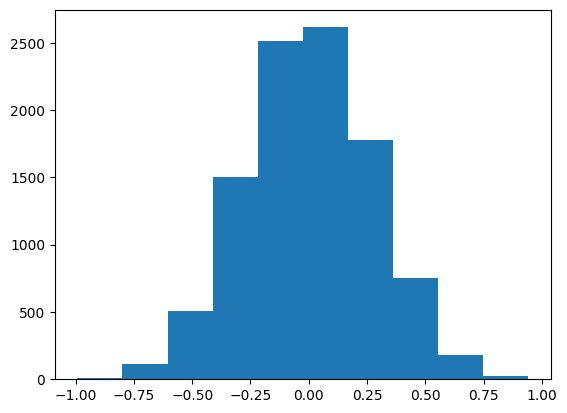

In [34]:
plt.hist(diffs)

With observerd statistic

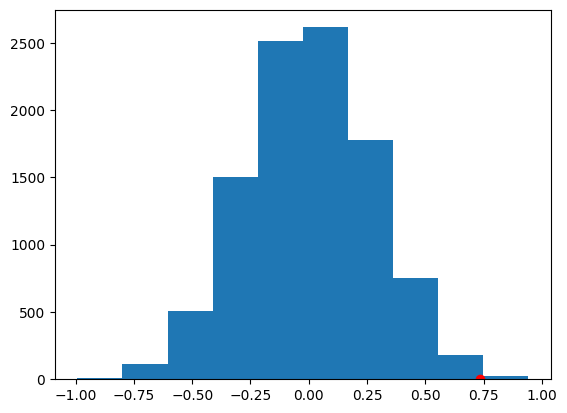

In [35]:
plt.hist(diffs)
plt.scatter(observed_difference, 1, color= 'red')
plt.show()

In [36]:
diffs = np.array(diffs)

In [37]:
p = np.count_nonzero(diffs >= observed_difference )/diffs.size

In [38]:
p

0.0032

As we can see the simulated differences are heavily centered around zero and out observerd difference is far from this  
So we can say that this is having very small P-value 0.3%

So we reject the null hypothesis  
conclude that the Patriots drops were too large to reflect chance variation alone.